In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
diabetes_data = pd.read_csv(r'C:\Users\0974\Documents\Materi Bootcamp Machine Learning\11 sept. 2020\pima-indians-diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [4]:
#replacing zeros with NaN for easier counting and replacing them with suitable values
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


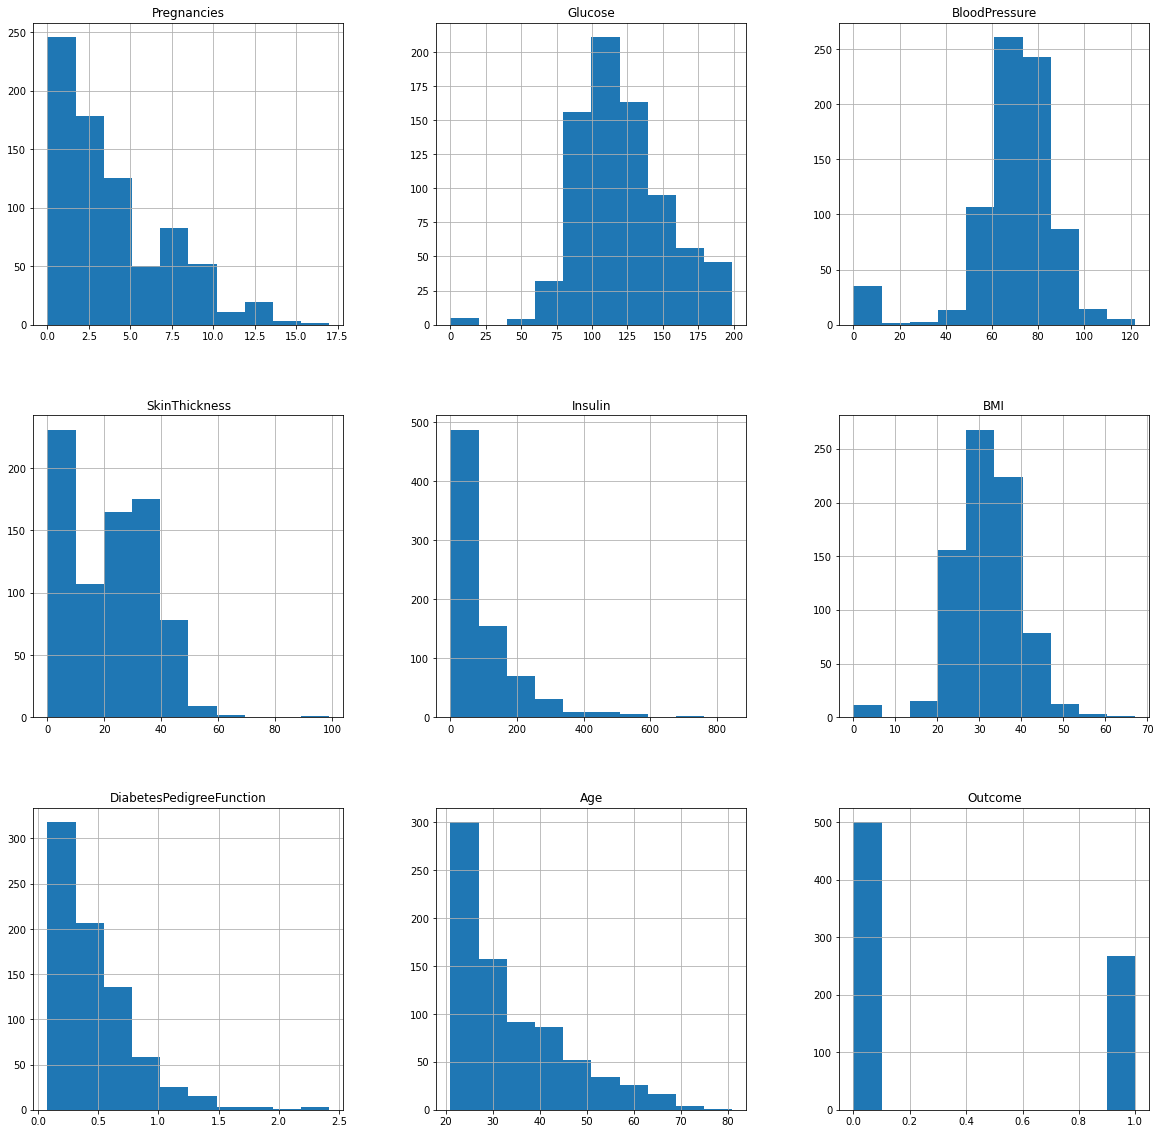

In [5]:
#distribusi data perlu kita mengerti agar NaN bisa kita ganti
p = diabetes_data.hist(figsize = (20, 20))

In [6]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)#hampir bellshape
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)#hampir bellshape
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)#right skewed
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)#right skewed
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].mean(), inplace = True)#almost bellshape

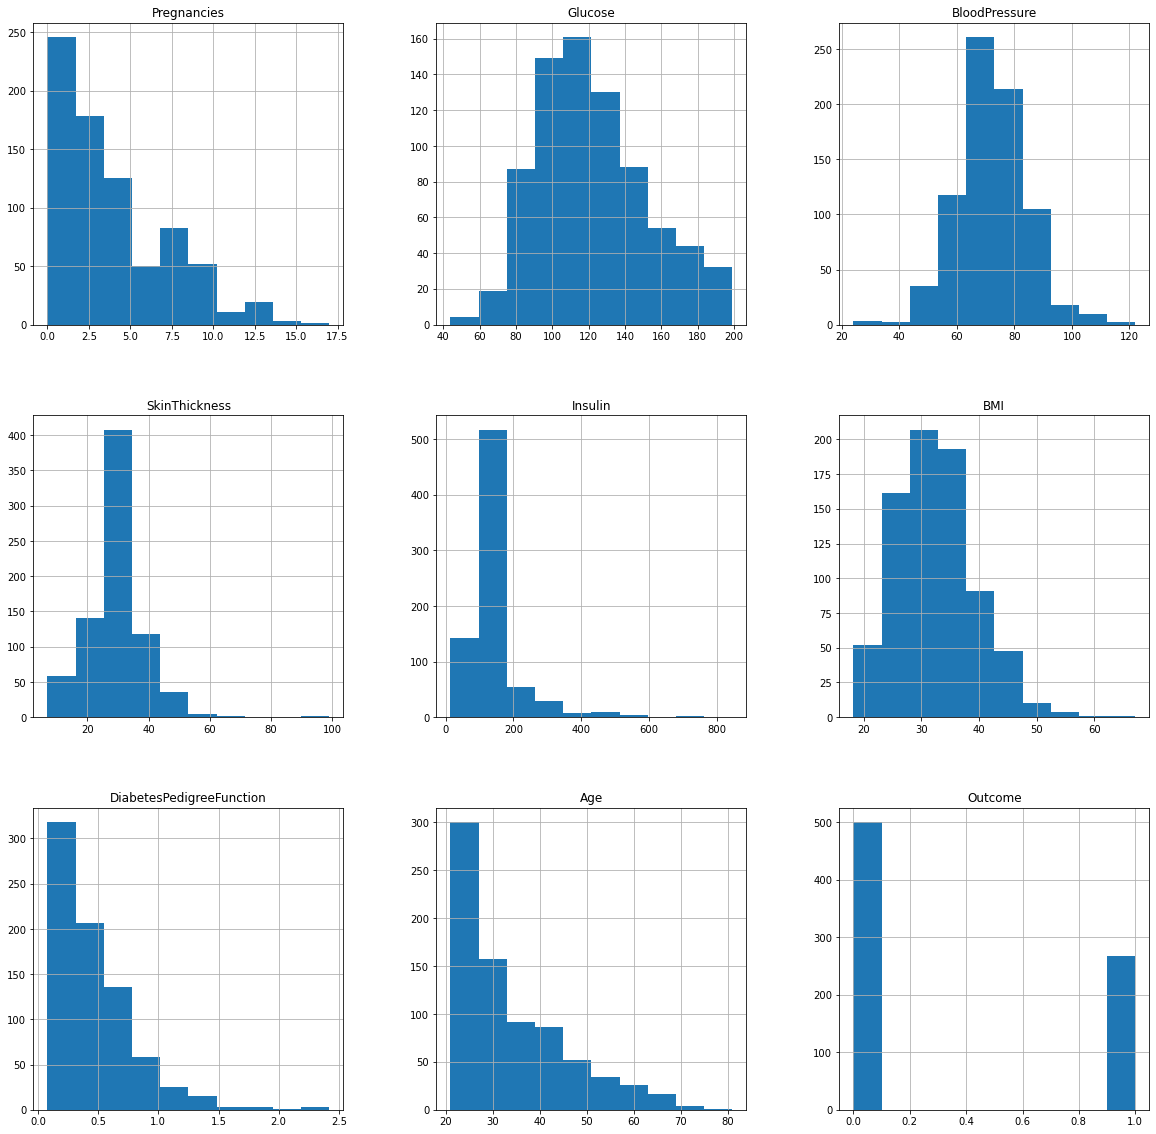

In [7]:
p = diabetes_data_copy.hist(figsize = (20,20))

In [8]:
diabetes_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


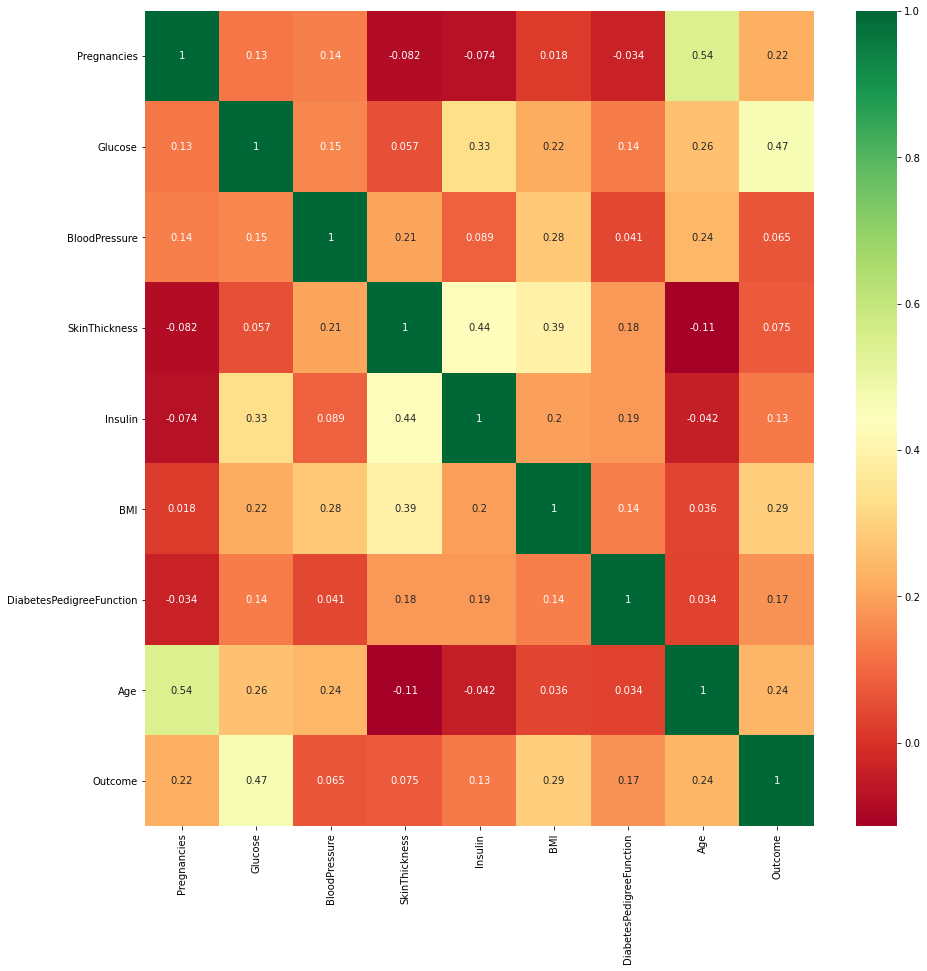

In [9]:
plt.figure(figsize=(15,15)) #heatmap for 1st dataset (uncleaned) because containing null values
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')

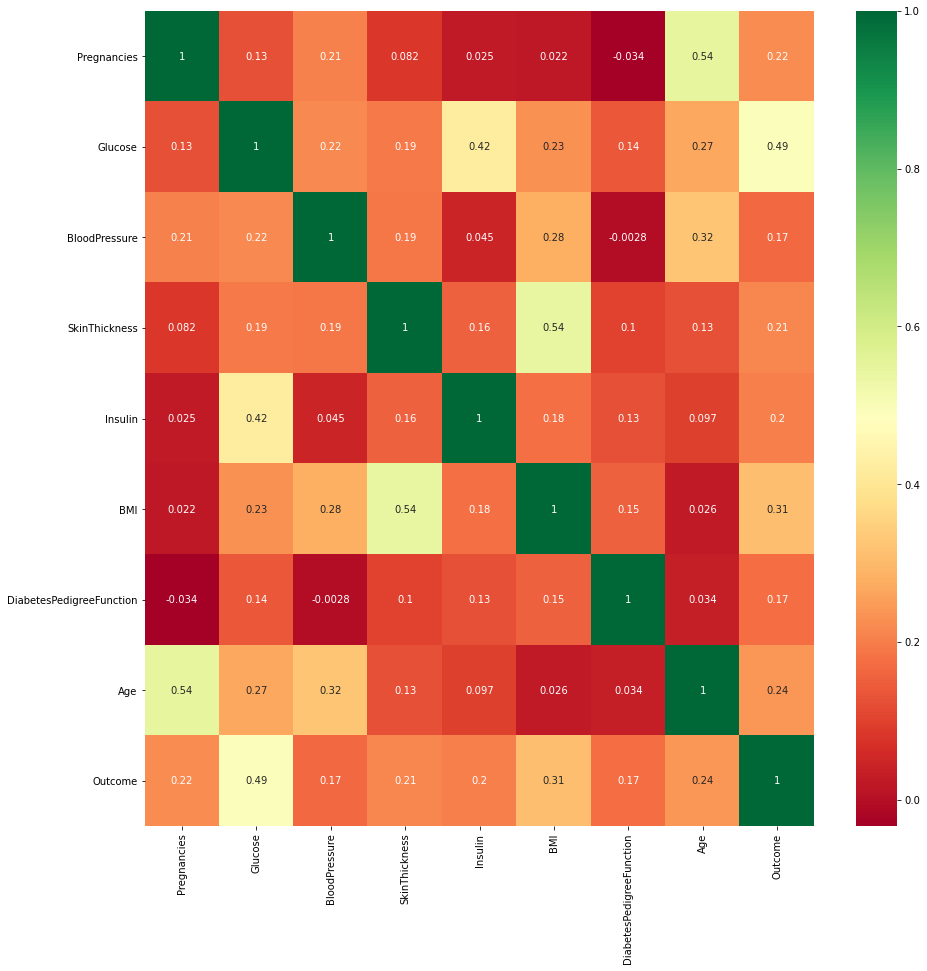

In [10]:
plt.figure(figsize=(15,15))  # cleaned dataset heatmap
p=sns.heatmap(diabetes_data_copy.corr(), annot=True,cmap ='RdYlGn')

In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(['Outcome'], axis = 1),), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [12]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.548980,5.484909,-0.020496


In [13]:
y = diabetes_data_copy.Outcome

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [23]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
est_num = [*range(25,301,25)]
for i,v in enumerate(est_num):
    model = GradientBoostingClassifier(n_estimators=v, max_features='sqrt')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print('Accuracy of GBClassifier with n_estimators {} on test set: {:.2f}'.format(v, model.score(X_test, y_test)))

Accuracy of GBClassifier with n_estimators 25 on test set: 0.78
Accuracy of GBClassifier with n_estimators 50 on test set: 0.75
Accuracy of GBClassifier with n_estimators 75 on test set: 0.77
Accuracy of GBClassifier with n_estimators 100 on test set: 0.75
Accuracy of GBClassifier with n_estimators 125 on test set: 0.78
Accuracy of GBClassifier with n_estimators 150 on test set: 0.77
Accuracy of GBClassifier with n_estimators 175 on test set: 0.77
Accuracy of GBClassifier with n_estimators 200 on test set: 0.75
Accuracy of GBClassifier with n_estimators 225 on test set: 0.79
Accuracy of GBClassifier with n_estimators 250 on test set: 0.81
Accuracy of GBClassifier with n_estimators 275 on test set: 0.77
Accuracy of GBClassifier with n_estimators 300 on test set: 0.78


In [24]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
est_num = [*range(25, 301, 25)]
for i,v in enumerate(est_num):
    model = RandomForestClassifier(n_estimators = v, bootstrap = True, random_state=42, max_features = 'sqrt')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print('Accuracy of  Random Forest with number of estimator {} on test set: {:.2f}'.format(v, model.score(X_test, y_test)))

Accuracy of  Random Forest with number of estimator 25 on test set: 0.79
Accuracy of  Random Forest with number of estimator 50 on test set: 0.83
Accuracy of  Random Forest with number of estimator 75 on test set: 0.83
Accuracy of  Random Forest with number of estimator 100 on test set: 0.81
Accuracy of  Random Forest with number of estimator 125 on test set: 0.81
Accuracy of  Random Forest with number of estimator 150 on test set: 0.82
Accuracy of  Random Forest with number of estimator 175 on test set: 0.81
Accuracy of  Random Forest with number of estimator 200 on test set: 0.81
Accuracy of  Random Forest with number of estimator 225 on test set: 0.79
Accuracy of  Random Forest with number of estimator 250 on test set: 0.78
Accuracy of  Random Forest with number of estimator 275 on test set: 0.78
Accuracy of  Random Forest with number of estimator 300 on test set: 0.79


In [17]:
#decisiontree
from sklearn.tree import DecisionTreeClassifier
detree_clf = DecisionTreeClassifier(criterion='gini', max_features='sqrt')
detree_clf.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy of  Decision Tree Classifier on test set: {:.2f} '.format(model.score(X_test, y_test)))

Accuracy of  Decision Tree Classifier on test set: 0.79 


In [18]:
#SVM
from sklearn.svm import SVC
kernel = ['poly', 'linear', 'rbf', 'sigmoid']
for index, knl in enumerate(kernel):
  classifier = SVC(kernel = knl)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  print('Accuracy of SVC({}) classifier on test set: {:.2f}'.format(knl, classifier.score(X_test, y_test)))

Accuracy of SVC(poly) classifier on test set: 0.74
Accuracy of SVC(linear) classifier on test set: 0.73
Accuracy of SVC(rbf) classifier on test set: 0.73
Accuracy of SVC(sigmoid) classifier on test set: 0.66


In [25]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
est_num = [*range(25, 301, 25)]
for index, val in enumerate(est_num):
    adboost_clf = AdaBoostClassifier(n_estimators = val, algorithm='SAMME.R')
    adboost_clf.fit(X_train, y_train)
    y_pred = adboost_clf.predict(X_test)
    print('Accuracy of AdaBoostClassifier with n_estimators {} on test set: {:.2f}'.format(val, adboost_clf.score(X_test, y_test)))

Accuracy of AdaBoostClassifier with n_estimators 25 on test set: 0.71
Accuracy of AdaBoostClassifier with n_estimators 50 on test set: 0.68
Accuracy of AdaBoostClassifier with n_estimators 75 on test set: 0.73
Accuracy of AdaBoostClassifier with n_estimators 100 on test set: 0.73
Accuracy of AdaBoostClassifier with n_estimators 125 on test set: 0.74
Accuracy of AdaBoostClassifier with n_estimators 150 on test set: 0.77
Accuracy of AdaBoostClassifier with n_estimators 175 on test set: 0.77
Accuracy of AdaBoostClassifier with n_estimators 200 on test set: 0.75
Accuracy of AdaBoostClassifier with n_estimators 225 on test set: 0.75
Accuracy of AdaBoostClassifier with n_estimators 250 on test set: 0.74
Accuracy of AdaBoostClassifier with n_estimators 275 on test set: 0.74
Accuracy of AdaBoostClassifier with n_estimators 300 on test set: 0.75


In [20]:
#XGBoostClassifier
from xgboost import XGBClassifier
est_num=[*range(25, 301, 25)]
for index,value in enumerate(est_num):
    xgb_clf = XGBClassifier(booster='gbtree', learning_rate = 0.3, max_depth = 10, alpha=5, n_estimators = value)
    xgb_clf.fit(X_train, y_train)
    y_pred = xgb_clf.predict(X_test)
    print('Accuracy of XGBoostClassifier with n_estimators of {} on test set: {:.2f}'.format(value, xgb_clf.score(X_test, y_test)))

Accuracy of XGBoostClassifier with n_estimators of 25 on test set: 0.83
Accuracy of XGBoostClassifier with n_estimators of 50 on test set: 0.83
Accuracy of XGBoostClassifier with n_estimators of 75 on test set: 0.83
Accuracy of XGBoostClassifier with n_estimators of 100 on test set: 0.83
Accuracy of XGBoostClassifier with n_estimators of 125 on test set: 0.83
Accuracy of XGBoostClassifier with n_estimators of 150 on test set: 0.83
Accuracy of XGBoostClassifier with n_estimators of 175 on test set: 0.83
Accuracy of XGBoostClassifier with n_estimators of 200 on test set: 0.83
Accuracy of XGBoostClassifier with n_estimators of 225 on test set: 0.83
Accuracy of XGBoostClassifier with n_estimators of 250 on test set: 0.83
Accuracy of XGBoostClassifier with n_estimators of 275 on test set: 0.83
Accuracy of XGBoostClassifier with n_estimators of 300 on test set: 0.83


In [21]:
#kNN
from sklearn.neighbors import KNeighborsClassifier
k_num = [*range(1, 20, 2)]
for index,value in enumerate(k_num):
    knn_clf = KNeighborsClassifier(value, algorithm = 'auto', p = 1)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    print('Accuracy of KNeighborsClassifier with k {} on test_set: {:.2f}'.format(value, knn_clf.score(X_test, y_test)))

Accuracy of KNeighborsClassifier with k 1 on test_set: 0.78
Accuracy of KNeighborsClassifier with k 3 on test_set: 0.81
Accuracy of KNeighborsClassifier with k 5 on test_set: 0.78
Accuracy of KNeighborsClassifier with k 7 on test_set: 0.78
Accuracy of KNeighborsClassifier with k 9 on test_set: 0.79
Accuracy of KNeighborsClassifier with k 11 on test_set: 0.82
Accuracy of KNeighborsClassifier with k 13 on test_set: 0.79
Accuracy of KNeighborsClassifier with k 15 on test_set: 0.78
Accuracy of KNeighborsClassifier with k 17 on test_set: 0.78
Accuracy of KNeighborsClassifier with k 19 on test_set: 0.78


In [22]:
'''
Hasil akurasi tertinggi diperoleh dengan menggunakan algoritma XGBoostClassifier sebesar 0.83 (83%). Hasil akurasi 0.83 juga
diperoleh dengan menggunakan algoritma Random Forest Classifier dengan jumlah n_estimator 50 dan 75.
'''

'\nHasil akurasi tertinggi diperoleh dengan menggunakan algoritma XGBoostClassifier sebesar 0.83 (83%). Hasil akurasi 0.83 juga\ndiperoleh dengan menggunakan algoritma Random Forest Classifier dengan jumlah n_estimator 50 dan 75.\n'